In [1]:
import numpy as np
import matplotlib.pyplot as plt



This notebook is for making quick inspection plots of the first snapshots timeseries.

In [2]:
snapshot=np.load("snapshots/single_board_snapshot1630458961.893498.npy")

In [3]:
#plot timeseries
#for j in range(4):
#    plt.figure(j+1)
#    for i in range(16):
#        plt.subplot(4,4,i+1)
#        plt.plot(snapshot[:,i+16*j+4],',')
#        
#        if i > 11:
#            plt.xlabel('time index')
#        if i%4==0:
#            plt.ylabel('antenna value')
#plt.show()

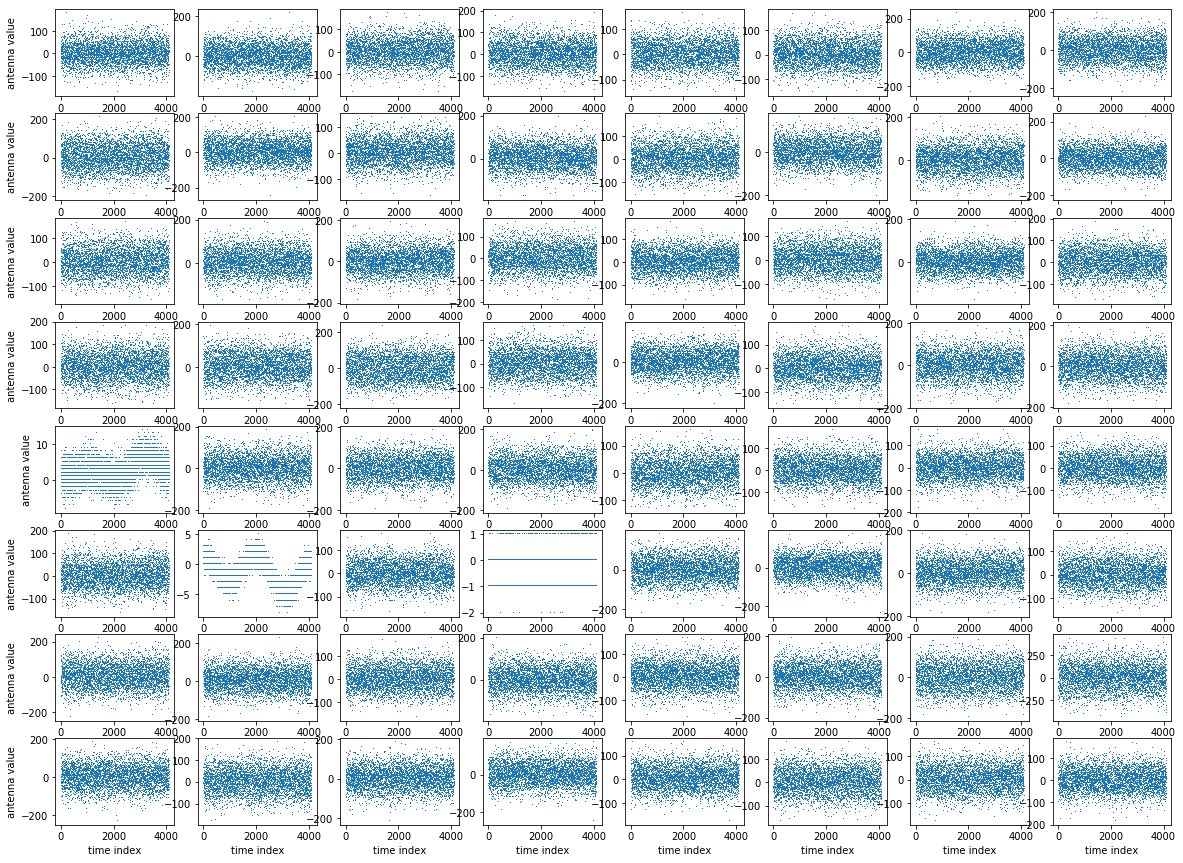

In [4]:
#plot timeseries
plt.figure(figsize=(20,15))
for i in range(64):
    plt.subplot(8,8,1+i)
    plt.plot(snapshot[:,i+4],',')
    if i > 55:
        plt.xlabel('time index')
    if i%8==0:
        plt.ylabel('antenna value')

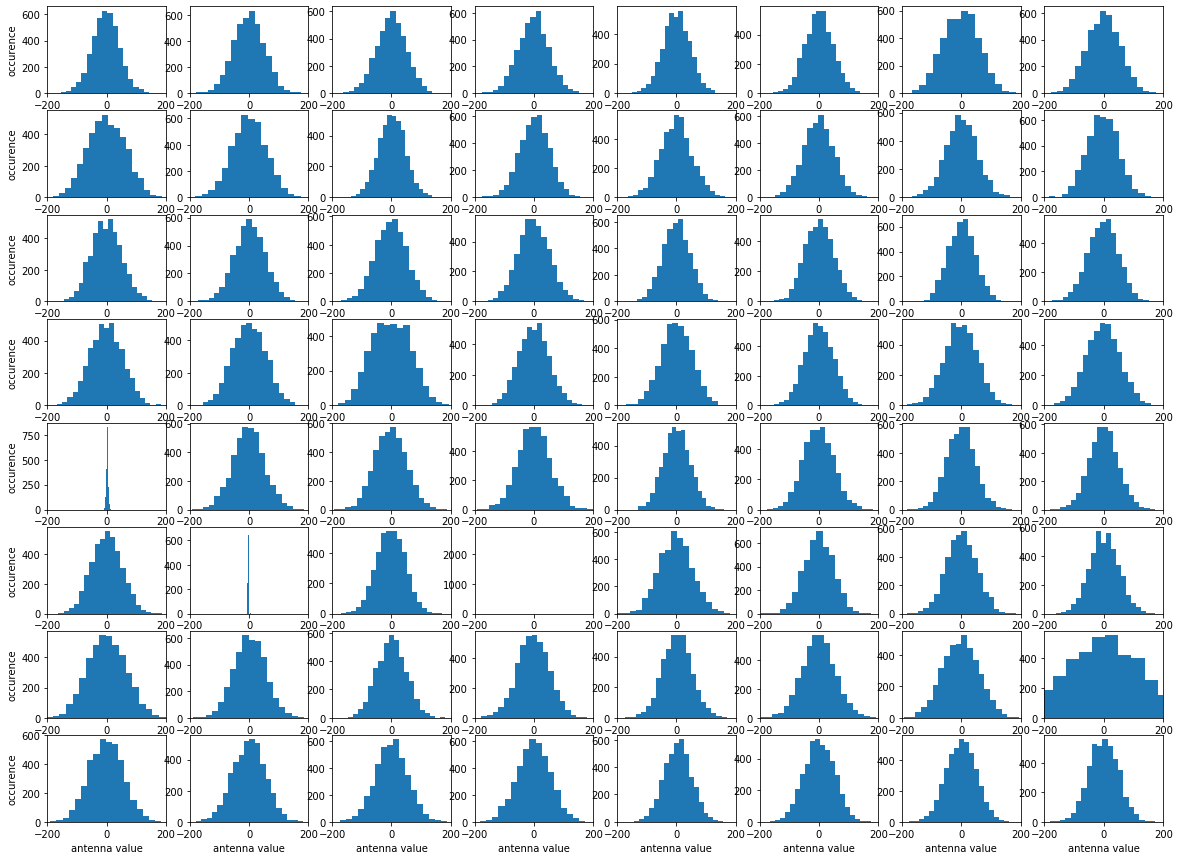

In [5]:
#plot histogram
plt.figure(figsize=(20,15))
for i in range(64):
    plt.subplot(8,8,1+i)
    plt.hist(snapshot[:,i+4],20)
    plt.xlim(-200,200)
    if i > 55:
        plt.xlabel('antenna value')
    if i%8==0:
        plt.ylabel('occurence')

2048.0
2049


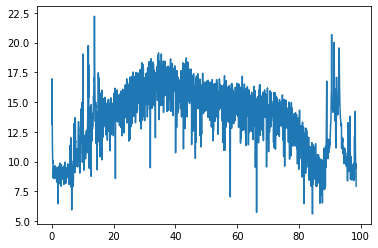

In [6]:
timeseries=snapshot[:,5]
spec=np.fft.rfft(timeseries)
fbins=np.linspace(0,197/2,int(1+4096/2))
plt.plot(fbins,np.log(np.square(np.abs(spec))))
print(len(timeseries)/2)
print(len(spec))

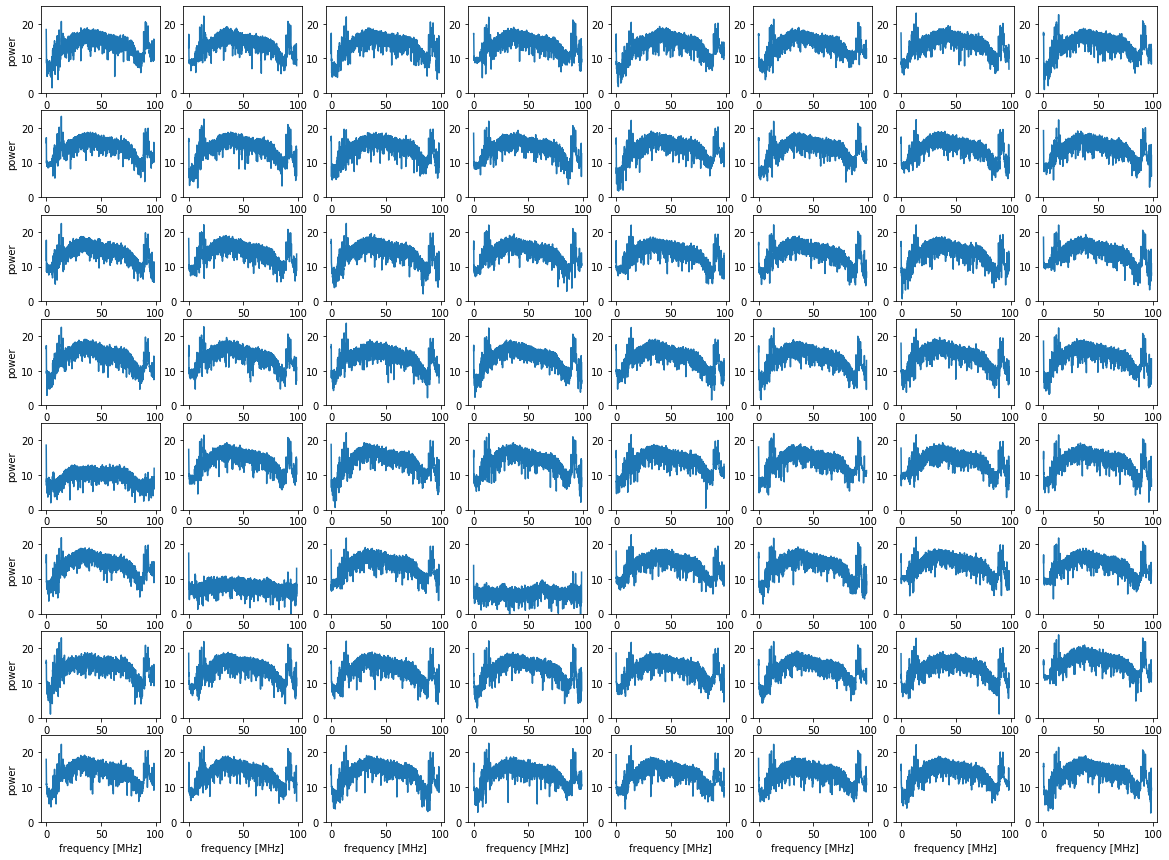

In [7]:
#plot spectra
fbins=np.linspace(0,197/2,int(1+4096/2))

plt.figure(figsize=(20,15))
for i in range(64):
    plt.subplot(8,8,1+i)
    spec=np.fft.rfft(snapshot[:,i+4])
    plt.plot(fbins,np.log(np.square(np.abs(spec))))
    plt.ylim(0,25)
    if i > 55:
        plt.xlabel('frequency [MHz]')
    if i%8==0:
        plt.ylabel('power')

## Compare rms

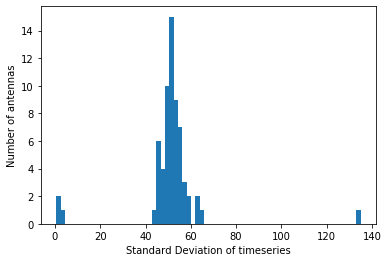

In [15]:
standard_deviations=[]
for i in range(64):
    standard_deviations.append(np.std(snapshot[:,i+4]))
plt.hist(standard_deviations,70)
plt.xlabel("Standard Deviation of timeseries")
plt.ylabel("Number of antennas")
plt.show()